# Домашнее задание к занятию "Алгоритмы классификации: линейные методы, логистическая регрессия и SVM"

### Условие: Задача состоит в модификации кода градиентного спуска для задачи регрессии (ноутбук лекции - Gradient_descent.ipynb). Необходимо, чтобы ваш градиентный спуск мог решать задачи классификации, а именно линейной классификации и логистической регрессии.
На всякий случай напомню, что код будет разный, поэтому жду от вас две функции градиентного спуска

In [1]:
import numpy as np
import random
from sklearn.datasets import make_blobs
import pylab
from scipy import stats
import pandas as pd
from matplotlib import pyplot as plt  

In [87]:
# загружаем данные
X, y = make_blobs(n_samples = 100, centers = 2,  
               cluster_std = 1, n_features = 1) 

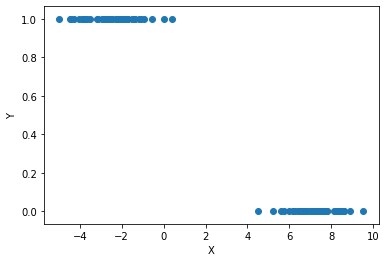

In [88]:
# отрисовываем деление на классы
plt.scatter(X[:, 0], y) 
plt.xlabel("X") 
plt.ylabel("Y") 
  
plt.show() 

In [89]:
# размер данных
m, n = np.shape(X)
m, n

(100, 1)

In [90]:
# преобразуем x к следующему виду (со смещением)
X = np.c_[np.ones(m), X]
X[:5]

array([[ 1.        , -1.07713619],
       [ 1.        , -2.9402286 ],
       [ 1.        ,  7.80715171],
       [ 1.        ,  7.28396129],
       [ 1.        ,  6.495164  ]])

In [92]:
# обучаем модель логистической регрессии на данных
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
# оценка модели
from sklearn.metrics import classification_report
y_pred = lg.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [33]:
# шаг алгоритма

In [101]:
def gradient_descent_2(alpha, x, y, numIterations):

    m = X.shape[0] # 100
    theta = np.ones(2) # веса модели
    x_transpose = X.transpose() # транспонированная матрица x
    
    for iter in range( 0, numIterations ):
        hypothesis = np.dot(X, theta) # матричное произведение
        
        a = 1/(1+np.exp(-hypothesis)) # сигмоида от линейной комбинации
        
        logloss = (np.dot(-y.T, np.log(a)) - np.dot((1 - y.T), np.log(1-a)))/m  # логистическая функция ошибки
     
        gradient = np.dot(x_transpose, (a - y))/m  # градиент
        theta = theta - alpha * gradient  # корректировка весов
    
    return theta

In [102]:
# формируем предсказания модели для полученных theta
m = X.shape[0]
for i in range(m):
    theta = gradient_descent_2(0.01, X, y, 1000)
    
y_predict = 1/(1+np.exp(-np.dot(X, theta)))


In [103]:
# y приводим к целочисленному формату и типу Series
y_predictt = [(1 if x >= 0.5 else 0) for x in y_predict]

In [104]:
y_predictt = pd.Series(y_predictt)
y_predictt

0     1
1     1
2     0
3     0
4     0
5     1
6     0
7     1
8     0
9     1
10    0
11    1
12    0
13    1
14    0
15    1
16    0
17    1
18    0
19    0
20    0
21    1
22    1
23    1
24    0
25    1
26    0
27    1
28    0
29    0
     ..
70    1
71    0
72    0
73    1
74    1
75    0
76    1
77    0
78    1
79    0
80    0
81    0
82    0
83    1
84    0
85    1
86    1
87    1
88    1
89    1
90    0
91    0
92    1
93    0
94    1
95    1
96    0
97    0
98    1
99    1
Length: 100, dtype: int64

In [105]:
# делаем оценку предсказания
print(classification_report(y, y_predictt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



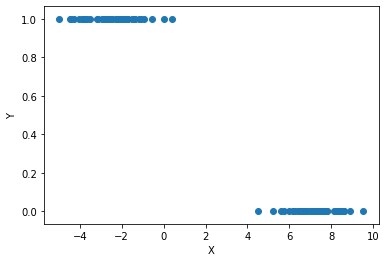

In [106]:
plt.scatter(X[:, 1], y_predictt) 
plt.xlabel("X") 
plt.ylabel("Y") 
  
plt.show() 